In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
df_x = pd.read_excel("House_Rent_Train.xlsx")

In [3]:
df_x.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


In [4]:
df_x.shape

(20555, 25)

In [5]:
df_x.isnull().sum()/len(df_x)*100

id                 0.000000
type               0.131355
locality           0.778399
activation_date    0.111895
latitude           0.111895
longitude          0.111895
lease_type         0.111895
gym                0.000000
lift               0.000000
swimming_pool      0.000000
negotiable         0.000000
furnishing         0.000000
parking            0.000000
property_size      0.000000
property_age       0.111895
bathroom           0.111895
facing             0.111895
cup_board          0.111895
floor              0.111895
total_floor        0.111895
amenities          0.111895
water_supply       0.111895
building_type      0.111895
balconies          0.111895
rent               0.111895
dtype: float64

In [7]:
df_x.describe()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent
count,20532.000000,20532.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000
mean,12.945748,77.637295,0.227049,0.362053,0.174848,0.711603,1062.017465,5.769920,1.858465,4.549922,1.874050,3.801335,1.149523,19056.733148
std,0.029601,0.110525,0.418935,0.480606,0.379846,0.453028,591.207446,6.350989,0.710926,335.154787,2.183982,3.183697,0.993549,8434.029016
min,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000
25%,12.918176,77.572068,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,12500.000000
50%,12.943790,77.633506,0.000000,0.000000,0.000000,1.000000,1047.000000,5.000000,2.000000,2.000000,1.000000,3.000000,1.000000,17500.000000
75%,12.970979,77.695723,0.000000,1.000000,0.000000,1.000000,1285.000000,10.000000,2.000000,3.000000,2.000000,4.000000,2.000000,24000.000000
max,12.999999,80.266346,1.000000,1.000000,1.000000,1.000000,50000.000000,400.000000,21.000000,48026.000000,25.000000,26.000000,13.000000,50000.000000


In [8]:
df_x.dtypes

id                  object
type                object
locality            object
activation_date     object
latitude           float64
longitude          float64
lease_type          object
gym                  int64
lift                 int64
swimming_pool        int64
negotiable           int64
furnishing          object
parking             object
property_size        int64
property_age       float64
bathroom           float64
facing              object
cup_board          float64
floor              float64
total_floor        float64
amenities           object
water_supply        object
building_type       object
balconies          float64
rent               float64
dtype: object

In [9]:
df_x["type"].unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS', '1BHK1', 'bhk2',
       'bhk3', nan], dtype=object)

In [10]:
df_x["type"] = df_x["type"].replace("bhk2","BHK2")
df_x["type"] = df_x["type"].replace("bhk3","BHK3")
df_x["type"] = df_x["type"].replace("1BHK1","BHK1")

In [11]:
df_x["type"].mode()[0]

'BHK2'

In [12]:
df_x["type"].value_counts()

type
BHK2        11694
BHK3         4400
BHK1         3617
RK1           553
BHK4          233
BHK4PLUS       31
Name: count, dtype: int64

In [13]:
df_x["type"] = df_x["type"].fillna(df_x["type"].mode()[0])
df_x["locality"] = df_x["locality"].fillna("Not mentioned")
df_x["activation_date"] = df_x["activation_date"].fillna(method = 'ffill')
df_x["latitude"] = df_x["latitude"].fillna(df_x["latitude"].mean())
df_x["longitude"] = df_x["longitude"].fillna(df_x["longitude"].mean())

In [14]:
df_x["lease_type"].unique()

array(['FAMILY', 'ANYONE', 'BACHELOR', 'COMPANY', nan], dtype=object)

In [220]:
df_x["lease_type"].value_counts()

lease_type
FAMILY      10190
ANYONE       9697
BACHELOR      587
COMPANY        58
Name: count, dtype: int64

In [15]:
df_x["lease_type"] = df_x["lease_type"].fillna(df_x["lease_type"].mode()[0])

C:\Users\NANDHU\AppData\Local\Temp\ipykernel_768\2331970417.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_x["property_age"])


<Axes: xlabel='property_age', ylabel='Density'>

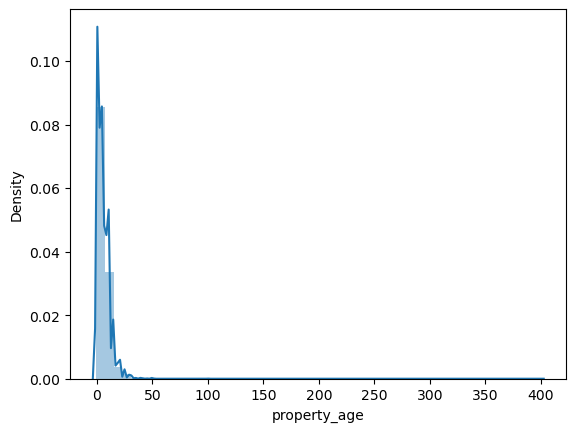

In [16]:
import seaborn as sns
sns.distplot(df_x["property_age"])

In [222]:
(df_x["property_age"].median())

5.0

In [17]:
df_x["property_age"] = df_x["property_age"].fillna(df_x["property_age"].median())

C:\Users\NANDHU\AppData\Local\Temp\ipykernel_8072\1084379539.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_x["bathroom"])


<Axes: xlabel='bathroom', ylabel='Density'>

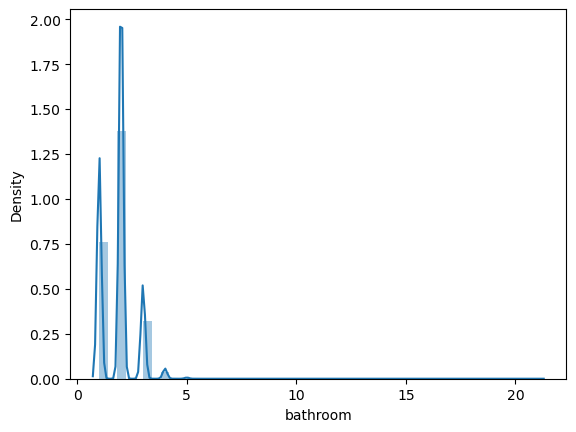

In [24]:
sns.distplot(df_x["bathroom"])

In [224]:
df_x["bathroom"].max()

21.0

In [18]:
import numpy as np
# Log transformation
df_x['bathroom'] = np.log1p(df_x['bathroom'])
df_x['bathroom'] = df_x['bathroom'].fillna(df_x['bathroom'].median())

In [19]:
df_x["facing"] = df_x["facing"].fillna(df_x["facing"].mode()[0])

C:\Users\NANDHU\AppData\Local\Temp\ipykernel_8072\2378672244.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_x["cup_board"])


<Axes: xlabel='cup_board', ylabel='Density'>

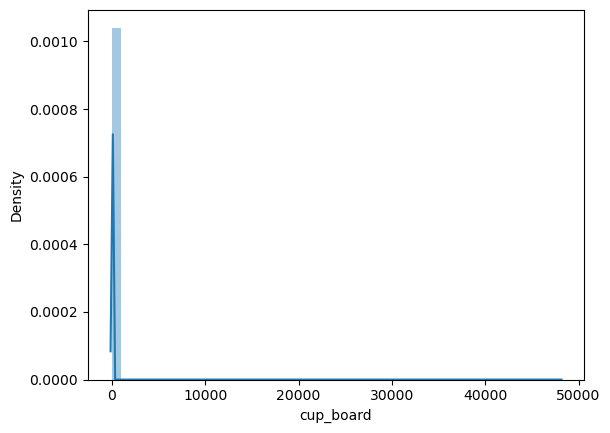

In [30]:
sns.distplot(df_x["cup_board"])

In [233]:
df_x["cup_board"].max()

10.779518631746203

In [20]:
df_x['cup_board'] = np.log1p(df_x['cup_board'])
df_x['cup_board'] = df_x['cup_board'].fillna(df_x['cup_board'].median())

C:\Users\NANDHU\AppData\Local\Temp\ipykernel_8072\1696899745.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_x["floor"])


<Axes: xlabel='floor', ylabel='Density'>

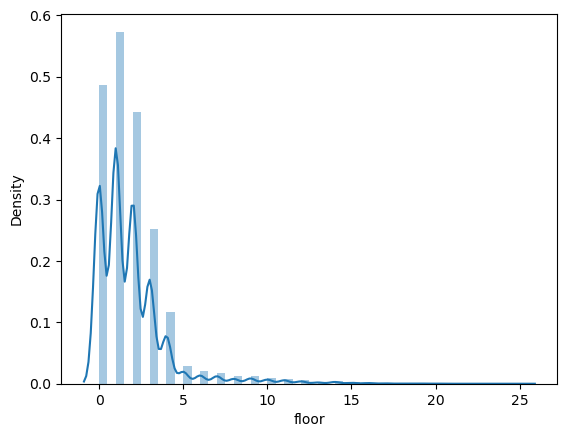

In [35]:
sns.distplot(df_x["floor"])

In [21]:
df_x["floor"].median()
df_x["floor"] = df_x["floor"].fillna(df_x["floor"].mean())

C:\Users\NANDHU\AppData\Local\Temp\ipykernel_8072\1615234943.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_x["total_floor"])


<Axes: xlabel='total_floor', ylabel='Density'>

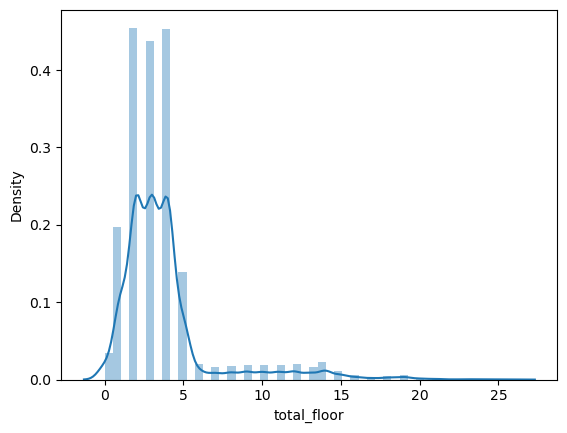

In [40]:
sns.distplot(df_x["total_floor"])

In [41]:
df_x["total_floor"].median()

3.0

In [22]:
df_x["total_floor"] = df_x["total_floor"].fillna(df_x["total_floor"].median())

In [237]:
df_x["amenities"].mode()[0]

'{"LIFT":false,"GYM":false,"INTERNET":true,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":false,"SC":false,"GP":false,"PARK":false,"RWH":false,"STP":false,"HK":false,"PB":false,"VP":false}'

In [23]:
import pandas as pd
from pandas import json_normalize
import json

# df_x is with a column 'amenities' containing JSON strings
# Fill NaN values with an empty dictionary
df_x['amenities'] = df_x['amenities'].fillna('{}')

# Filter out rows with non-JSON data or empty strings
df_x = df_x[df_x['amenities'].apply(lambda x: isinstance(x, str) and x.strip() != '' and x.strip()[0] == '{')]

# Convert the column to dictionaries
df_x['amenities'] = df_x['amenities'].apply(json.loads)

# Use json_normalize to flatten the JSON structure into separate columns
df_normalized = json_normalize(df_x['amenities'])

# Concatenate the new columns with the original DataFrame
df_x = pd.concat([df_x, df_normalized], axis=1)

# Now you can access individual amenities as separate columns in the DataFrame
print(df_x['INTERNET'])


0         True
1        False
2        False
3        False
4        False
         ...  
20550      NaN
20551      NaN
20552      NaN
20553      NaN
20554      NaN
Name: INTERNET, Length: 20555, dtype: object


In [24]:
df_x.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent', 'LIFT', 'GYM',
       'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS', 'SERVANT',
       'SECURITY', 'SC', 'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP'],
      dtype='object')

In [25]:
df_x.isnull().sum()/len(df_x)*100

id                 0.000000
type               0.000000
locality           0.000000
activation_date    0.000000
latitude           0.000000
longitude          0.000000
lease_type         0.000000
gym                0.000000
lift               0.000000
swimming_pool      0.000000
negotiable         0.000000
furnishing         0.000000
parking            0.000000
property_size      0.000000
property_age       0.000000
bathroom           0.000000
facing             0.000000
cup_board          0.000000
floor              0.000000
total_floor        0.000000
amenities          0.000000
water_supply       0.111895
building_type      0.111895
balconies          0.111895
rent               0.111895
LIFT               0.111895
GYM                0.413525
INTERNET           0.111895
AC                 0.111895
CLUB               5.302846
INTERCOM           0.111895
POOL               0.111895
CPA                5.302846
FS                 0.111895
SERVANT            5.302846
SECURITY           0

In [26]:
df_x["water_supply"] = df_x["water_supply"].fillna(df_x["water_supply"].mode()[0])

In [27]:
df_x["building_type"] = df_x["building_type"].fillna(df_x["building_type"].mode()[0])

In [28]:
df_x["balconies"] = df_x["balconies"].fillna(df_x["balconies"].mean())

In [29]:
df_x["PARK"] = df_x["PARK"].fillna(df_x["PARK"].mode()[0])
df_x['PARK'] = df_x['PARK'].map({False: 0, True: 1})
df_x["HK"] = df_x["HK"].fillna(df_x["HK"].mode()[0])
df_x['HK'] = df_x['HK'].map({False: 0, True: 1})
df_x["PB"] = df_x["PB"].fillna(df_x["PB"].mode()[0])
df_x['PB'] = df_x['PB'].map({False: 0, True: 1})
df_x["SC"] = df_x["SC"].fillna(df_x["SC"].mode()[0])
df_x['SC'] = df_x['SC'].map({False: 0, True: 1})
df_x["VP"] = df_x["VP"].fillna(df_x["VP"].mode()[0])
df_x['VP'] = df_x['VP'].map({False: 0, True: 1})
df_x["SECURITY"] = df_x["SECURITY"].fillna(df_x["SECURITY"].mode()[0])
df_x['SECURITY'] = df_x['SECURITY'].map({False: 0, True: 1})
df_x["STP"] = df_x["STP"].fillna(df_x["STP"].mode()[0])
df_x['STP'] = df_x['STP'].map({False: 0, True: 1})
df_x["RWH"] = df_x["RWH"].fillna(df_x["RWH"].mode()[0])
df_x['RWH'] = df_x['RWH'].map({False: 0, True: 1})
df_x["GP"] = df_x["GP"].fillna(df_x["GP"].mode()[0])
df_x['GP'] = df_x['GP'].map({False: 0, True: 1})
df_x["SERVANT"] = df_x["SERVANT"].fillna(df_x["SERVANT"].mode()[0])
df_x['SERVANT'] = df_x['SERVANT'].map({False: 0, True: 1})
df_x["CPA"] = df_x["CPA"].fillna(df_x["CPA"].mode()[0])
df_x['CPA'] = df_x['CPA'].map({False: 0, True: 1})
df_x["CLUB"] = df_x["CLUB"].fillna(df_x["CLUB"].mode()[0])
df_x['CLUB'] = df_x['CLUB'].map({False: 0, True: 1})
df_x["FS"] = df_x["FS"].fillna(df_x["FS"].mode()[0])
df_x['FS'] = df_x['FS'].map({False: 0, True: 1})
df_x["INTERNET"] = df_x["INTERNET"].fillna(df_x["INTERNET"].mode()[0])
df_x['INTERNET'] = df_x['INTERNET'].map({False: 0, True: 1})
df_x["POOL"] = df_x["POOL"].fillna(df_x["POOL"].mode()[0])
df_x['POOL'] = df_x['POOL'].map({False: 0, True: 1})
df_x["GYM"] = df_x["GYM"].fillna(df_x["GYM"].mode()[0])
df_x['GYM'] = df_x['GYM'].map({False: 0, True: 1})
df_x["LIFT"] = df_x["LIFT"].fillna(df_x["LIFT"].mode()[0])
df_x['LIFT'] = df_x['LIFT'].map({False: 0, True: 1})
df_x["AC"] = df_x["AC"].fillna(df_x["AC"].mode()[0])
df_x['AC'] = df_x['AC'].map({False: 0, True: 1})
df_x["INTERCOM"] = df_x["INTERCOM"].fillna(df_x["INTERCOM"].mode()[0])
df_x['INTERCOM'] = df_x['INTERCOM'].map({False: 0, True: 1})

In [79]:
df_x.isnull().sum()/len(df_x)*100

id               0.0
type             0.0
locality         0.0
latitude         0.0
longitude        0.0
lease_type       0.0
gym              0.0
lift             0.0
swimming_pool    0.0
negotiable       0.0
furnishing       0.0
parking          0.0
property_size    0.0
property_age     0.0
bathroom         0.0
facing           0.0
cup_board        0.0
floor            0.0
total_floor      0.0
amenities        0.0
water_supply     0.0
building_type    0.0
balconies        0.0
rent             0.0
LIFT             0.0
GYM              0.0
INTERNET         0.0
AC               0.0
CLUB             0.0
INTERCOM         0.0
POOL             0.0
CPA              0.0
FS               0.0
SERVANT          0.0
SECURITY         0.0
SC               0.0
GP               0.0
PARK             0.0
RWH              0.0
STP              0.0
HK               0.0
PB               0.0
VP               0.0
year             0.0
month            0.0
dtype: float64

In [77]:
df_x["rent"].median()

17500.0

In [78]:
df_x["rent"] = df_x["rent"].fillna(df_x["rent"].median())

In [31]:
df_x.dtypes

id                  object
type                object
locality            object
activation_date     object
latitude           float64
longitude          float64
lease_type          object
gym                  int64
lift                 int64
swimming_pool        int64
negotiable           int64
furnishing          object
parking             object
property_size        int64
property_age       float64
bathroom           float64
facing              object
cup_board          float64
floor              float64
total_floor        float64
amenities           object
water_supply        object
building_type       object
balconies          float64
rent               float64
LIFT                 int64
GYM                  int64
INTERNET             int64
AC                   int64
CLUB                 int64
INTERCOM             int64
POOL                 int64
CPA                  int64
FS                   int64
SERVANT              int64
SECURITY             int64
SC                   int64
G

In [33]:
df_x["type"] = df_x["type"].map({"RK1":0,"BHK1":1,"BHK2":2,"BHK3":3,"BHK4":4,"BHK4PLUS":5})
#df_x['type'] = df_x['type'].astype(float).astype(int)

In [34]:
#frequency encoding
df_x["locality"] = df_x["locality"].replace(df_x["locality"].value_counts(normalize=True)*100)

In [35]:
df_x['activation_date'] = pd.to_datetime(df_x['activation_date'], format='%d-%m-%Y %H:%M')

In [36]:
df_x['year'] = df_x['activation_date'].dt.year
df_x['month'] = df_x['activation_date'].dt.month

df_x = df_x.drop('activation_date', axis=1)

In [400]:
df_x["lease_type"].unique()

array(['FAMILY', 'ANYONE', 'BACHELOR', 'COMPANY'], dtype=object)

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_x["lease_type"] = le.fit_transform(df_x["lease_type"])

In [38]:
df_x["facing"].value_counts()

facing
E     9557
N     5925
W     2632
S     1219
NE     817
SE     197
NW     149
SW      59
Name: count, dtype: int64

In [39]:
le = LabelEncoder()
df_x["water_supply"] = le.fit_transform(df_x["water_supply"])

In [40]:
le = LabelEncoder()
df_x["building_type"] = le.fit_transform(df_x["building_type"])

In [41]:
df_x["furnishing"] = df_x["furnishing"].map({"SEMI_FURNISHED":2,"NOT_FURNISHED":1,"FULLY_FURNISHED":3})

In [42]:
df_x["parking"] = df_x["parking"].map({"NONE":0,"TWO_WHEELER":1,"FOUR_WHEELER":2,"BOTH":3})

In [43]:
df_x["facing"] = le.fit_transform(df_x["facing"])

In [45]:
df_x.describe()

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,SC,GP,PARK,RWH,STP,HK,PB,VP,year,month
count,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,...,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000
mean,2.011481,1.105007,12.945748,77.637295,1.524787,0.227049,0.362053,0.174848,0.711603,1.987692,...,0.470932,0.100219,0.506008,0.246655,0.170567,0.198686,0.365118,0.238725,2017.637120,6.329263
std,0.745956,1.164910,0.029585,0.110464,1.478761,0.418935,0.480606,0.379846,0.453028,0.355792,...,0.499166,0.300299,0.499976,0.431075,0.376139,0.399021,0.481475,0.426315,0.480842,3.251556
min,0.000000,0.004865,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000
25%,2.000000,0.131355,12.918211,77.572150,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,4.000000
50%,2.000000,0.724884,12.943866,77.633653,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,6.000000
75%,2.000000,1.761129,12.970944,77.695702,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2018.000000,9.000000
max,5.000000,4.393092,12.999999,80.266346,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,12.000000


In [44]:
df_x.columns

Index(['id', 'type', 'locality', 'latitude', 'longitude', 'lease_type', 'gym',
       'lift', 'swimming_pool', 'negotiable', 'furnishing', 'parking',
       'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
       'floor', 'total_floor', 'amenities', 'water_supply', 'building_type',
       'balconies', 'rent', 'LIFT', 'GYM', 'INTERNET', 'AC', 'CLUB',
       'INTERCOM', 'POOL', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC', 'GP',
       'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP', 'year', 'month'],
      dtype='object')

In [80]:
df_x1 = df_x.drop(columns=["id","amenities","rent","LIFT","POOL","GYM","PARK"])

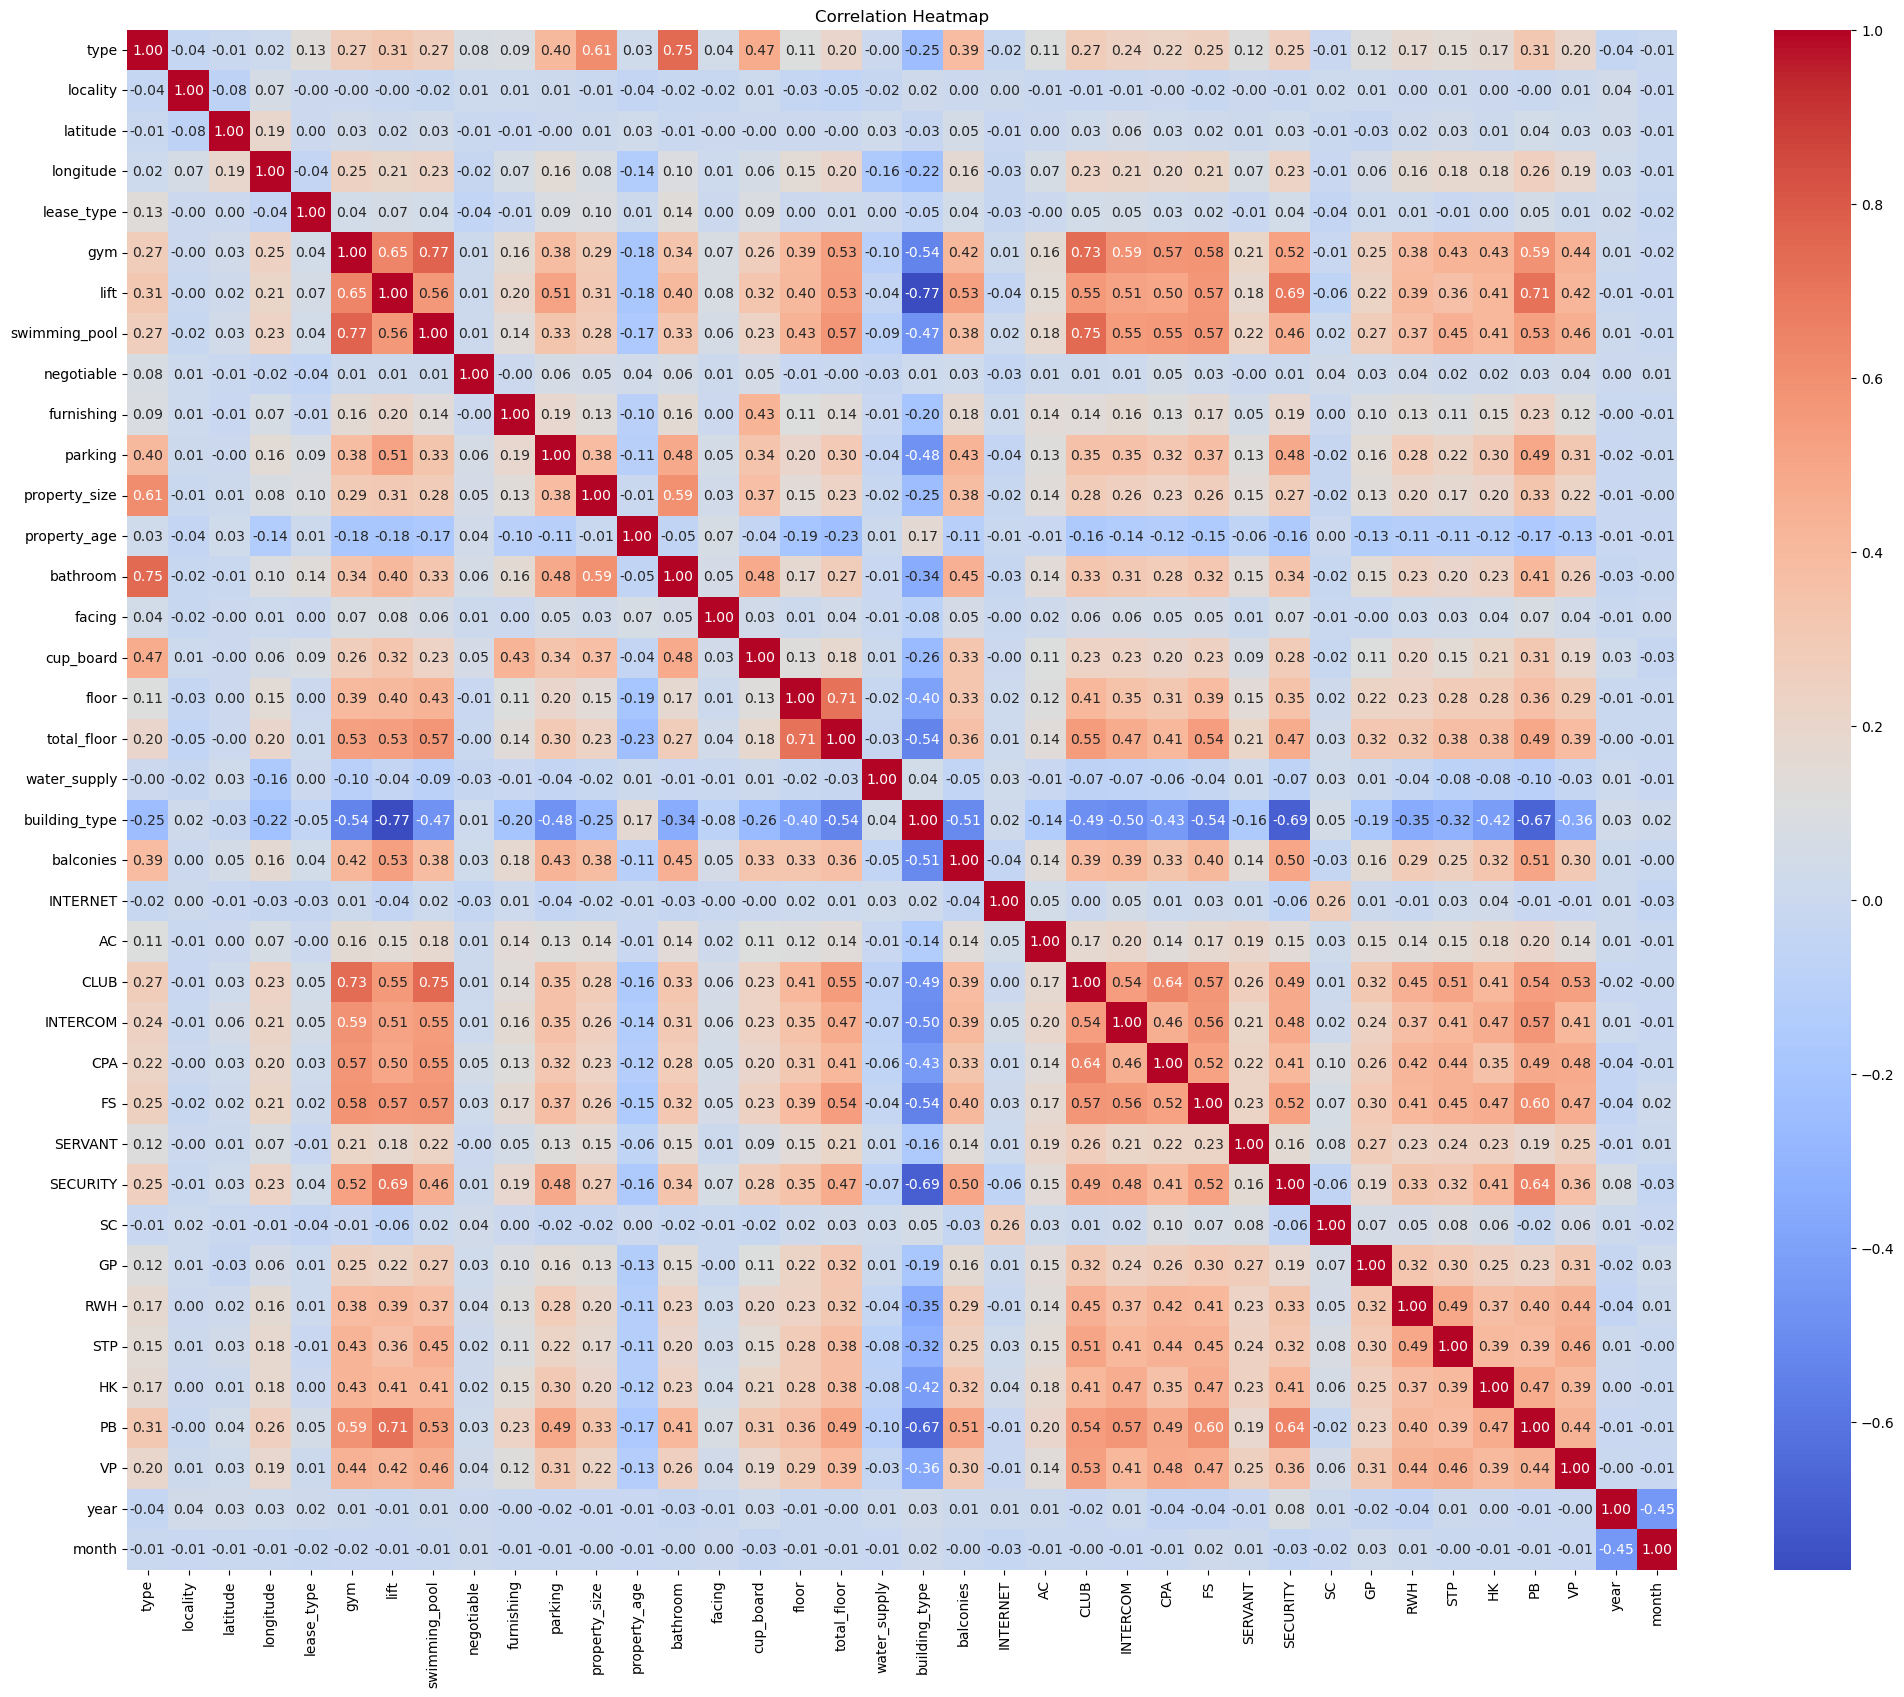

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df_x1.corr()

# Create a heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [65]:
df_x1.corr()

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,SECURITY,SC,GP,RWH,STP,HK,PB,VP,year,month
type,1.000000,-0.035849,-0.005185,0.015258,0.132852,0.273446,0.311794,0.266784,0.077752,0.093472,...,0.254245,-0.011908,0.118878,0.172752,0.152199,0.165270,0.312758,0.195774,-0.035044,-0.007757
locality,-0.035849,1.000000,-0.075313,0.065019,-0.001411,-0.001449,-0.003973,-0.018592,0.012213,0.012271,...,-0.008148,0.018134,0.012022,0.002779,0.007854,0.001784,-0.004675,0.005914,0.036114,-0.011949
latitude,-0.005185,-0.075313,1.000000,0.194640,0.002380,0.034965,0.019413,0.034905,-0.009016,-0.011827,...,0.027815,-0.008235,-0.026681,0.020970,0.032551,0.010039,0.042622,0.027847,0.033509,-0.007401
longitude,0.015258,0.065019,0.194640,1.000000,-0.042211,0.245421,0.207947,0.229282,-0.024602,0.073635,...,0.226827,-0.010019,0.056637,0.160228,0.182410,0.180393,0.255871,0.186970,0.026327,-0.007906
lease_type,0.132852,-0.001411,0.002380,-0.042211,1.000000,0.042630,0.066097,0.040182,-0.044015,-0.010101,...,0.039795,-0.042641,0.013579,0.014297,-0.011013,0.000970,0.050394,0.006395,0.021306,-0.021762
gym,0.273446,-0.001449,0.034965,0.245421,0.042630,1.000000,0.645250,0.768926,0.008446,0.158779,...,0.521880,-0.010432,0.249159,0.384941,0.432549,0.426594,0.586123,0.441272,0.008589,-0.015703
lift,0.311794,-0.003973,0.019413,0.207947,0.066097,0.645250,1.000000,0.564135,0.010782,0.197061,...,0.691716,-0.062802,0.222882,0.393675,0.361349,0.411341,0.709979,0.421582,-0.008936,-0.013461
swimming_pool,0.266784,-0.018592,0.034905,0.229282,0.040182,0.768926,0.564135,1.000000,0.010602,0.136164,...,0.462894,0.017313,0.269909,0.365325,0.452210,0.410850,0.525869,0.458786,0.006444,-0.008799
negotiable,0.077752,0.012213,-0.009016,-0.024602,-0.044015,0.008446,0.010782,0.010602,1.000000,-0.001498,...,0.007302,0.038873,0.030075,0.038658,0.021733,0.023634,0.025744,0.037576,0.001753,0.005710
furnishing,0.093472,0.012271,-0.011827,0.073635,-0.010101,0.158779,0.197061,0.136164,-0.001498,1.000000,...,0.190538,0.001136,0.097153,0.128283,0.105484,0.151907,0.226179,0.124261,-0.004780,-0.009071


In [ ]:
#non correlated columns
'locality', 'latitude', 'longitude', 'lease_type', 'negotiable', 'furnishing','facing', 
'cup_board', 'floor', 'total_floor', 'water_supply', 'SERVANT', 'SC', 'GP', 'RWH', 'STP', 'HK',
 'VP', 'year', 'month'

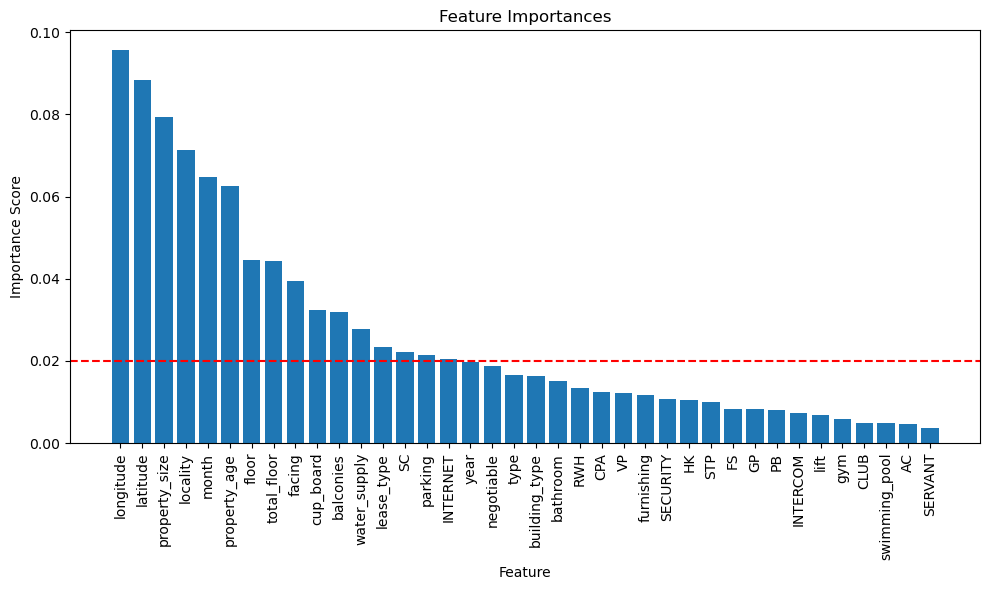

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df_x1
y = df_x['rent']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extract feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.axhline(y=0.02, color='r', linestyle='--')
plt.tight_layout()
plt.show()


features =
'locality', 'latitude','longitude','lease_type','negotiable', 'furnishing', 'year', 'month'
'facing', 'cup_board','water_supply','INTERNET','AC','SERVANT','property_size','balconies',
'property_age','floor','parking','SC'


'total_floor', 
  'GP', 'RWH',
'STP', 'HK','VP',

In [84]:
df_x_feature = df_x1[['locality', 'latitude','longitude','lease_type','negotiable', 'furnishing', 
                      'year', 'month','facing', 'cup_board','water_supply','INTERNET','AC','SC',
                      'SERVANT','property_size','balconies','property_age','floor','parking']]

In [85]:
df_x_target = df_x[["rent"]]

In [87]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

In [109]:
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_x_feature)

In [111]:
#LINEAR MODEL
reg = linear_model.LinearRegression()
reg.fit(df_x_scaled,df_x_target) #fitting the model

LinearRegression()

In [112]:
#finding co_efficient
reg.coef_

array([[-124.24694584,   76.27499491,  458.4939359 ,   49.80776657,
         175.83162237,  366.12814549,   58.44719935,   30.55454048,
         200.40147512, 1415.68650131,  123.44339247,  -62.9377365 ,
         754.82544255,   20.5588129 ,  487.17596558, 3025.96093239,
        1133.29419557,  589.97532145, 1141.12482886, 1384.79124931]])

In [113]:
#finding intercept
reg.intercept_

array([19054.99124301])

TEST DATA

In [92]:
df_y = pd.read_excel("House_Rent_Test.xlsx")

In [93]:
df_y.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies
0,ff8081815df539bc015df947ce976cca,BHK2,Basavanagudi,22-08-2017 09:00,12.941603,77.568156,FAMILY,0,1,0,...,1,2,N,2,3,3,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,1
1,ff80818157288e9301572c05651853a6,BHK2,Rajaji Nagar,17-09-2017 16:33,12.998803,77.561887,ANYONE,0,0,0,...,7,1,S,2,0,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0
2,ff8081815f1afc58015f1b831fde166e,BHK1,Jeevan Bima Nagar,14-04-2018 17:27,12.966467,77.661063,ANYONE,0,0,0,...,10,1,S,1,0,1,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0
3,ff8081816035b31901603f7922c046e0,BHK1,Jayanagar 1st Block,2017-11-12 13:15:00,12.941533,77.592606,ANYONE,0,0,0,...,8,1,E,0,2,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,0
4,ff8081815c3582f5015c38fc31aa73a4,BHK3,Whitefield Hope Farm Junction,2017-11-07 16:44:00,12.971083,77.751625,ANYONE,1,1,1,...,0,3,E,3,3,4,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,1


In [94]:
df_y.shape

(4500, 24)

In [95]:
df_y.isnull().sum()/len(df_y)*100

id                 0.0
type               0.0
locality           0.0
activation_date    0.0
latitude           0.0
longitude          0.0
lease_type         0.0
gym                0.0
lift               0.0
swimming_pool      0.0
negotiable         0.0
furnishing         0.0
parking            0.0
property_size      0.0
property_age       0.0
bathroom           0.0
facing             0.0
cup_board          0.0
floor              0.0
total_floor        0.0
amenities          0.0
water_supply       0.0
building_type      0.0
balconies          0.0
dtype: float64

In [96]:
df_y["type"] = df_y["type"].replace("bhk2","BHK2")
df_y["type"] = df_y["type"].replace("bhk3","BHK3")
df_y["type"] = df_y["type"].replace("1BHK1","BHK1")

In [101]:
df_y["type"] = df_y["type"].map({"RK1":0,"BHK1":1,"BHK2":2,"BHK3":3,"BHK4":4,"BHK4PLUS":5})
#frequency encoding
df_y["locality"] = df_y["locality"].replace(df_y["locality"].value_counts(normalize=True)*100)
df_y['activation_date'] = pd.to_datetime(df_y['activation_date'], format='%d-%m-%Y %H:%M')
df_y['year'] = df_y['activation_date'].dt.year
df_y['month'] = df_y['activation_date'].dt.month

df_y = df_y.drop('activation_date', axis=1)


In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_y["lease_type"] = le.fit_transform(df_y["lease_type"])

In [103]:
df_y["water_supply"] = le.fit_transform(df_y["water_supply"])
df_y["building_type"] = le.fit_transform(df_y["building_type"])
df_y["furnishing"] = df_y["furnishing"].map({"SEMI_FURNISHED":2,"NOT_FURNISHED":1,"FULLY_FURNISHED":3})
df_y["parking"] = df_y["parking"].map({"NONE":0,"TWO_WHEELER":1,"FOUR_WHEELER":2,"BOTH":3})
df_y["facing"] = le.fit_transform(df_y["facing"])

In [104]:
# Filter out rows with non-JSON data or empty strings
df_y = df_y[df_y['amenities'].apply(lambda y: isinstance(y, str) and y.strip() != '' and y.strip()[0] == '{')]

# Convert the column to dictionaries
df_y['amenities'] = df_y['amenities'].apply(json.loads)

# Use json_normalize to flatten the JSON structure into separate columns
df_normalized_y = json_normalize(df_y['amenities'])

# Concatenate the new columns with the original DataFrame
df_y = pd.concat([df_y, df_normalized_y], axis=1)

# Now you can access individual amenities as separate columns in the DataFrame
print(df_y['INTERNET'])

0       False
1        True
2        True
3        True
4        True
        ...  
4495     True
4496     True
4497    False
4498     True
4499    False
Name: INTERNET, Length: 4500, dtype: bool


In [105]:

df_y["SC"] = df_y["SC"].fillna(df_y["SC"].mode()[0])
df_y['SC'] = df_y['SC'].map({False: 0, True: 1})

df_y["SERVANT"] = df_y["SERVANT"].fillna(df_y["SERVANT"].mode()[0])
df_y['SERVANT'] = df_y['SERVANT'].map({False: 0, True: 1})

df_y["INTERNET"] = df_y["INTERNET"].fillna(df_y["INTERNET"].mode()[0])
df_y['INTERNET'] = df_y['INTERNET'].map({False: 0, True: 1})

df_y["AC"] = df_y["AC"].fillna(df_y["AC"].mode()[0])
df_y['AC'] = df_y['AC'].map({False: 0, True: 1})

In [106]:
df_y_feature = df_y[['locality', 'latitude','longitude','lease_type','negotiable', 'furnishing', 
                      'year', 'month','facing', 'cup_board','water_supply','INTERNET','AC','SC',
                      'SERVANT','property_size','balconies','property_age','floor','parking']]

In [115]:
df_y_trans = scaler.transform(df_y_feature)

In [116]:
predicted = reg.predict(df_y_trans)
predicted

array([[23574.11032452],
       [15600.55165181],
       [13375.10335526],
       ...,
       [13295.11464348],
       [36989.79875016],
       [42541.60186017]])